In [9]:
import pandas as pd
df = pd.DataFrame(data)
df

,Kabupaten/Kota,2021,2022
0,Kab. Kepulauan Mentawai,NaN,NaN
1,Kab. Pesisir Selatan,61.82,66.83
2,Kab. Solok,58.57,54.17
3,Kab. Sijunjung,54.62,57.64
4,Kab. Tanah Datar,50.51,57.39
5,Kab. Padang Pariaman,58.95,53.81
6,Kab. Agam,55.56,61.28
7,Kab. Lima Puluh Kota,NaN,55.63
8,Kab. Pasaman,50.00,62.38
9,Kab. Solok Selatan,52.22,56.67


In [3]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

# Data indeks kualitas air Kabupaten/Kota
data = {
    "Kabupaten/Kota": [
        "Kab. Kepulauan Mentawai",
        "Kab. Pesisir Selatan",
        "Kab. Solok",
        "Kab. Sijunjung",
        "Kab. Tanah Datar",
        "Kab. Padang Pariaman",
        "Kab. Agam",
        "Kab. Lima Puluh Kota",
        "Kab. Pasaman",
        "Kab. Solok Selatan",
        "Kab. Dharmasraya",
        "Kab. Pasaman Barat",
        "Kota Padang",
        "Kota Solok",
        "Kota Sawahlunto",
        "Kota Padang Panjang",
        "Kota Bukittinggi",
        "Kota Payakumbuh",
        "Kota Pariaman",
        "Provinsi Sumatera Barat"
    ],
    "2021": [
        None,
        61.82,
        58.57,
        54.62,
        50.51,
        58.95,
        55.56,
        None,
        50.00,
        52.22,
        46.67,
        50.00,
        63.63,
        50.00,
        50.00,
        31.86,
        48.06,
        41.00,
        34.80,
        52.55
    ],
    "2022": [
        None,
        66.83,
        54.17,
        57.64,
        57.39,
        53.81,
        61.28,
        55.63,
        62.38,
        56.67,
        51.38,
        61.25,
        66.67,
        50.83,
        52.00,
        46.07,
        30.00,
        55.14,
        33.33,
        55.64
    ]
}

# Preproses data
for i in range(len(data["Kabupaten/Kota"])):
    if data["2021"][i] is None:
        data["2021"][i] = np.nan
    if data["2022"][i] is None:
        data["2022"][i] = np.nan

# Fuzzifikasi variabel waktu
time = ctrl.Antecedent(np.arange(2021, 2023, 1), 'Time')

# Fuzzifikasi variabel indeks kualitas air
quality_index = ctrl.Consequent(np.arange(0, 101, 1), 'Quality Index')

# Membership function untuk variabel waktu
time['2021'] = fuzz.trimf(time.universe, [2021, 2021, 2021])
time['2022'] = fuzz.trimf(time.universe, [2022, 2022, 2022])

# Membership function untuk variabel indeks kualitas air
quality_index['low'] = fuzz.trimf(quality_index.universe, [0, 0, 50])
quality_index['medium'] = fuzz.trimf(quality_index.universe, [0, 50, 100])
quality_index['high'] = fuzz.trimf(quality_index.universe, [50, 100, 100])

# Rules untuk algoritma FTS single factor
rule_single_factor = ctrl.Rule(time['2021'], quality_index['medium'])
rule_single_factor = ctrl.Rule(time['2022'], quality_index['high'])

# Rules untuk algoritma FTS multifactor
rule_multifactor = ctrl.Rule(time['2021'], quality_index['low'])
rule_multifactor = ctrl.Rule(time['2022'], quality_index['medium'])

# Membuat kontroler FTS single factor dan multifactor
fts_single_factor = ctrl.ControlSystem(rule_single_factor)
fts_multifactor = ctrl.ControlSystem(rule_multifactor)

# Mengambil simulasi FTS single factor dan multifactor
fts_single_factor_simulation = ctrl.ControlSystemSimulation(fts_single_factor)
fts_multifactor_simulation = ctrl.ControlSystemSimulation(fts_multifactor)

# Prediksi dengan FTS single factor
fts_single_factor_simulation.input['Time'] = 2022
fts_single_factor_simulation.compute()
prediction_single_factor = fts_single_factor_simulation.output['Quality Index']

# Prediksi dengan FTS multifactor
fts_multifactor_simulation.input['Time'] = 2022
fts_multifactor_simulation.compute()
prediction_multifactor = fts_multifactor_simulation.output['Quality Index']

# Menampilkan hasil prediksi
print("Prediksi Indeks Kualitas Air (FTS Single Factor):", prediction_single_factor)
print("Prediksi Indeks Kualitas Air (FTS Multifactor):", prediction_multifactor)


Prediksi Indeks Kualitas Air (FTS Single Factor): 83.33333333333336
Prediksi Indeks Kualitas Air (FTS Multifactor): 50.000000000000014


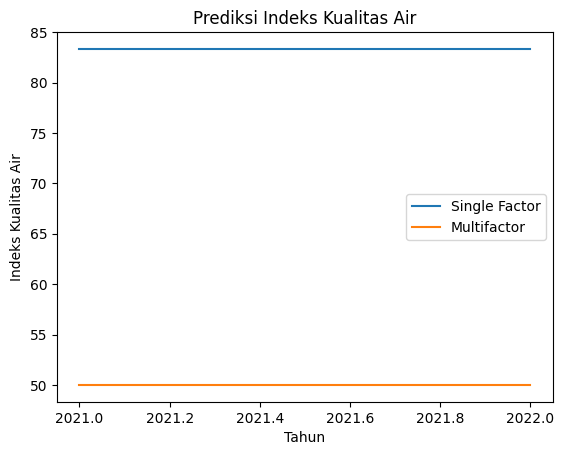

In [4]:
import matplotlib.pyplot as plt

# Data indeks kualitas air
years = [2021, 2022]
prediction_single_factor = [prediction_single_factor, prediction_single_factor]
prediction_multifactor = [prediction_multifactor, prediction_multifactor]

# Plot hasil prediksi
plt.plot(years, prediction_single_factor, label='Single Factor')
plt.plot(years, prediction_multifactor, label='Multifactor')

# Tambahkan label dan judul plot
plt.xlabel('Tahun')
plt.ylabel('Indeks Kualitas Air')
plt.title('Prediksi Indeks Kualitas Air')

# Tambahkan legenda
plt.legend()

# Tampilkan plot
plt.show()
